In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

RANDOM_STATE = 42

In this notebook I try different classical ML models with default parameters

# Data loading

In [3]:
# loading data

df = pd.read_csv("../data/processed/data.csv")
print(df.shape)
df.head(2)

(209216, 210)


,E_91,E_53,E_159,E_129,E_154,E_155,E_210,E_140,E_51,E_75,...,E_121,E_120,E_142,E_195,E_183,E_224,E_223,E_5,SEX,PATHOLOGY
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,URTI
1,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,HIV (initial infection)


In [4]:
X = df.drop(['PATHOLOGY'], axis=1)
y = df['PATHOLOGY']
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state=RANDOM_STATE)

print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("X_valid: ", X_valid.shape)

X_train:  (146451, 209)
X_test:   (31382, 209)
X_valid:  (31383, 209)


# Logistic regression

In [5]:
clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=10000)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9891976292141992

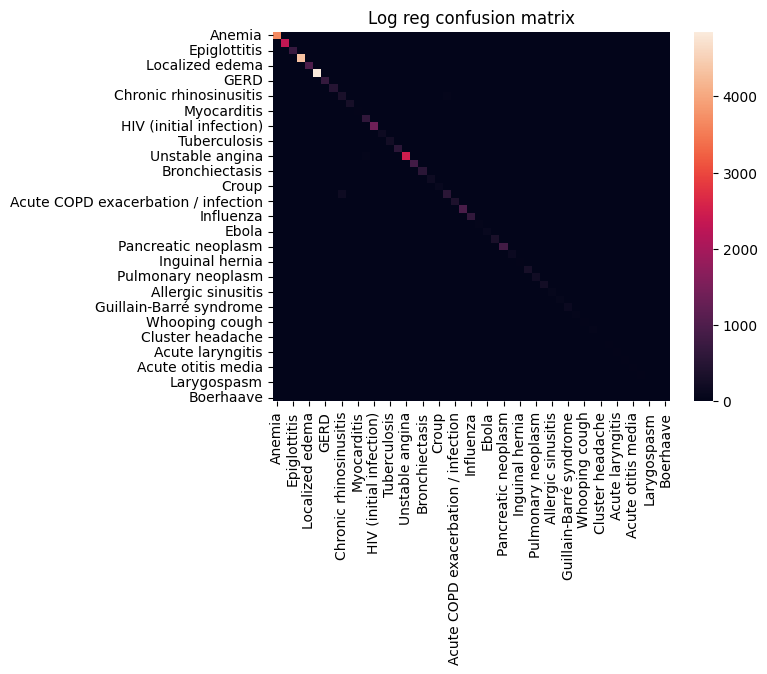

In [6]:
test_labels=y_test.unique()

conf_matrix = confusion_matrix(y_test, pred, labels=test_labels)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=test_labels, index=test_labels)
sns.heatmap(conf_matrix_df)
plt.title("Log reg confusion matrix");

# Decision tree

In [7]:
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9787776432349755

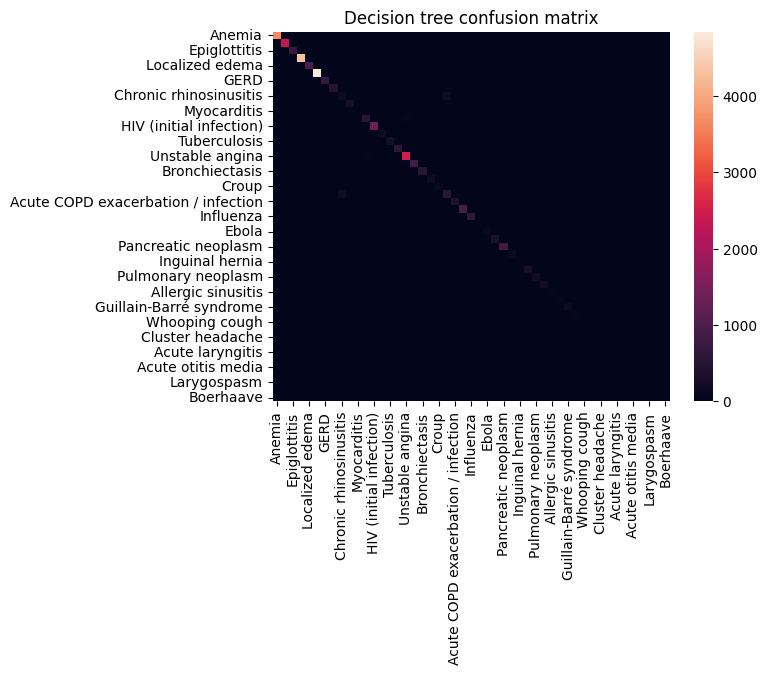

In [8]:
conf_matrix = confusion_matrix(y_test, pred, labels=test_labels)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=test_labels, index=test_labels)
sns.heatmap(conf_matrix_df)
plt.title("Decision tree confusion matrix");

# Random forest

In [9]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

# 1 min 37 sec

0.9828882799056784

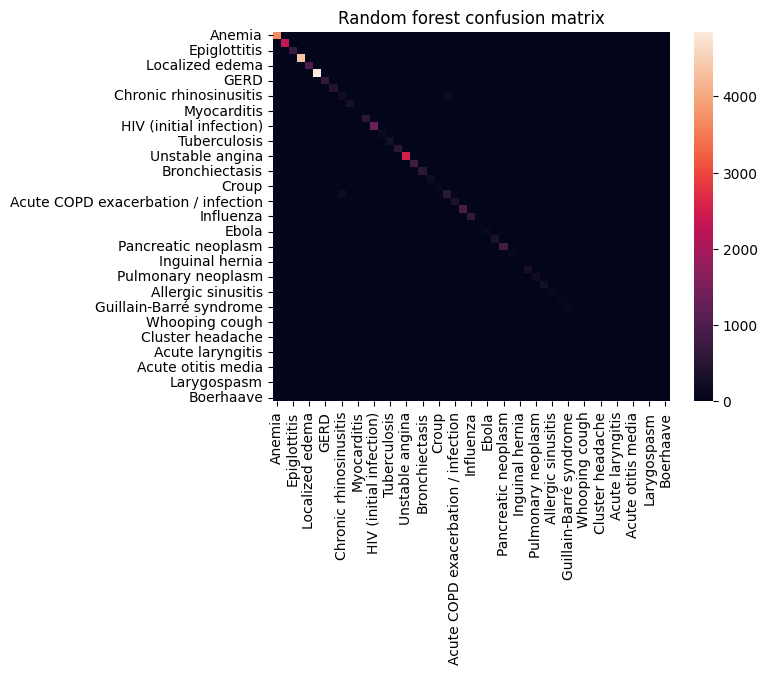

In [10]:
conf_matrix = confusion_matrix(y_test, pred, labels=test_labels)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=test_labels, index=test_labels)
sns.heatmap(conf_matrix_df)
plt.title("Random forest confusion matrix");